In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

## **1. Considerar que el numero de prestamos de un banco muestran una probabilidad de default de 5%. Utilizando un proceso de Bernoulli, determinar la probabilidad de que el banco pierda dinero. Dadas las tasas de interes del banco, en caso de tener 10 de 100 defaulters el banco trabaja en perdida.**

In [ ]:
# defaulter es el exito de la simulacion

In [61]:
#np.random.seed(42)
n_events = 100
probability = 0.05


def bernoulli_trails(n_events, probability):
    defaulters = 0
    for i in range(n_events):
        number = np.random.random()
        if number < probability:
            defaulters += 1
    return np.array(defaulters) # Es el número de veces que el número aleatorio es menor que la probabilidad
    



<Axes: ylabel='Probability'>

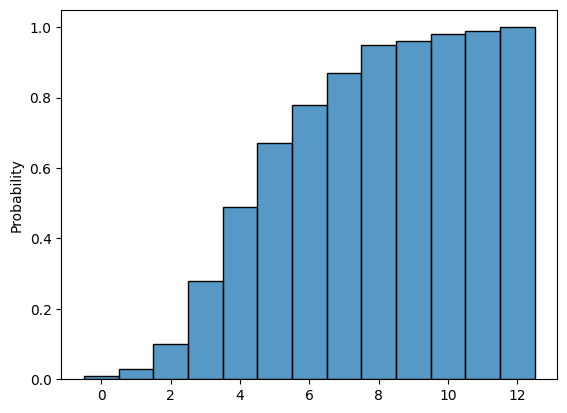

In [62]:
n_simulations = 100
defaulters = []
for i in range(n_simulations):
    number = bernoulli_trails(n_events, probability)
    defaulters.append(number)
    defaulter_array = np.array(defaulters)

#sns.histplot(defaulters, discrete=True, stat='probability', bins=10)
sns.histplot(defaulter_array, discrete=True, stat='probability', bins=10, cumulative=True)


# numero de defaulters por cada 100 eventos

In [65]:
1 - defaulter_array[defaulter_array < 10].sum() / defaulter_array.sum() # 1 - probabilidad de que haya menos de 10 defaulters

# viendo esto tenemos que la probabilidad de que haya más de 10 defaulters es de 8%

0.08793456032719837

In [55]:
# promedio
np.mean(defaulters)

5.21

## **2. Con base en data historica determinaste que tu empresa pierde aproximadamente 1.5 clientes por dia. Simular el proceso de perdida de clientes del primer trimestre del año.**

In [18]:
rate = 1.5 # clientes por día 

<Axes: ylabel='Probability'>

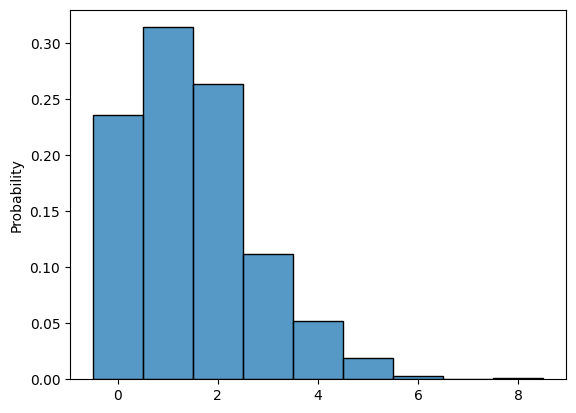

In [11]:
# simulación de un proceso de poisson
np.random.seed(42)
n_events = 1000
simulated_data = poisson.rvs(mu=rate, size=n_events)
sns.histplot(simulated_data, discrete=True, stat='probability', bins=10)


In [27]:
# simulacion proceso de poisson
inter_arrival_time = []
events = []
event_times = []
time_clock = 0
periodo_tiempo = 31+29+31
while time_clock <= periodo_tiempo:
    # n_events=10
    # for i in range(n_events):
    inter_arrival_time.append(expon.rvs(scale=1/rate))
    events.append(poisson.rvs(rate))
    event_times = np.cumsum(inter_arrival_time)
    time_clock = max(event_times)

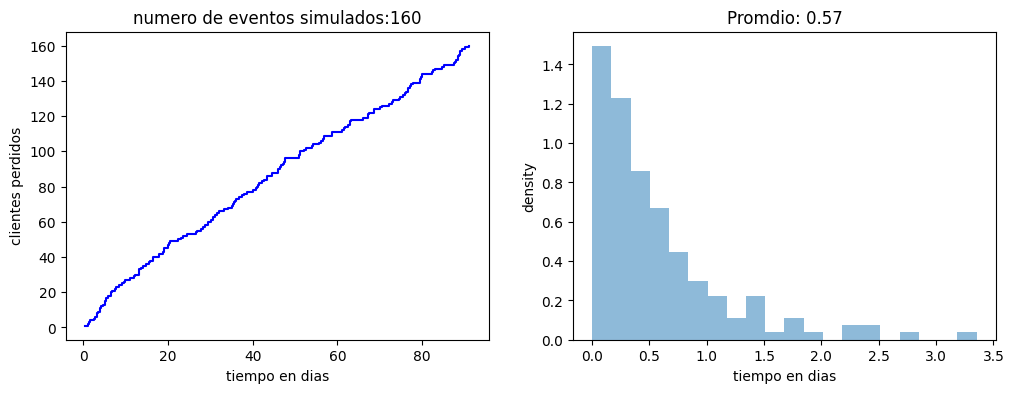

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
#proceso de Poisson
ax[0].step(event_times, np.arange(1, len(events)+1), where='post', color='blue')
ax[0].set_xlabel('tiempo en dias')
ax[0].set_ylabel('clientes perdidos')
ax[0].set_title(f'numero de eventos simulados:{len(events)}')

# distribucion de tiempos entre eventos
ax[1].hist(inter_arrival_time, bins=20, alpha=0.5, density='True')
ax[1].set_xlabel('tiempo en dias')
ax[1].set_ylabel('density')
ax[1].set_title(f'Promdio: {np.mean(inter_arrival_time):.2f}')
plt.show()

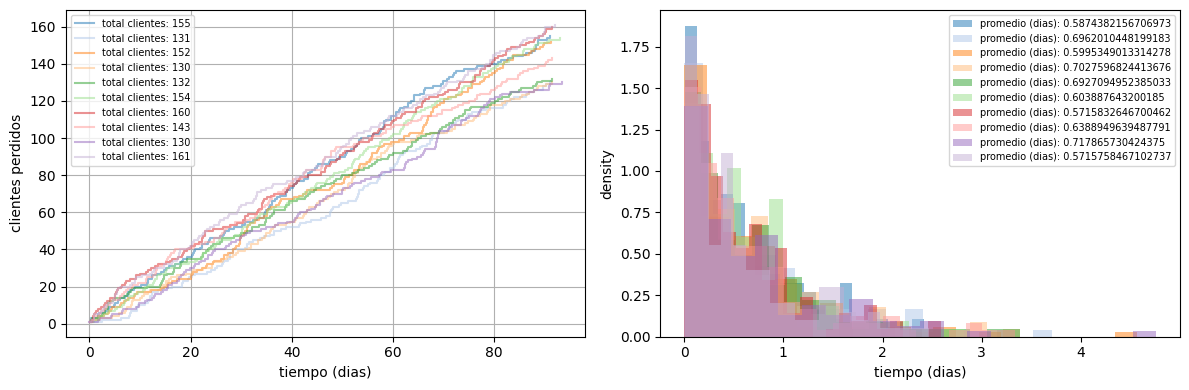

In [36]:
# simulacion de procesos de Poisson
time_duration = 31+29+31
numero_simulaciones = 10
event_list = []
inter_arrival_time_list = []
event_time_list = []
for i in range(numero_simulaciones):
  # simulacion de un proceso Poisson
  inter_arrival_times = []
  events = []
  event_times = []
  # flag temporal
  time_clock = 0
  # crear inter-arrival times y eventos
  while time_clock <= time_duration:
      inter_arrival_times.append(expon.rvs(scale=1 / rate))
      events.append(poisson.rvs(rate))
      event_times = np.cumsum(inter_arrival_times)
      time_clock = max(event_times)
  
  event_list.append(events)
  inter_arrival_time_list.append(inter_arrival_times)
  event_time_list.append(event_times)
# representacion proceso Poisson
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# proceso Poisson
ax[0].set_xlabel('tiempo (dias)')
ax[0].set_ylabel('clientes perdidos')

ax[0].grid(True)
# distribucion de tiempos entre eventos (inter-arrival times)
ax[1].set_xlabel('tiempo (dias)')
ax[1].set_ylabel('density')

color_palette = plt.get_cmap('tab20')
colors = [color_palette(i) for i in range(numero_simulaciones)]
for events, inter_arrival_times, event_times, color in zip(event_list, inter_arrival_time_list, event_time_list, colors):
  ax[0].step(event_times, np.arange(1, len(events) + 1), where='post', alpha=0.5, label=f'total clientes: {len(events)}', color=color)
  ax[1].hist(inter_arrival_times, bins=20, alpha=0.5, density=True, label=f'promedio (dias): {np.mean(inter_arrival_times)}', color=color)
ax[0].legend(fontsize='7')
ax[1].legend(fontsize='7')
plt.tight_layout()
plt.show()